# 시간 흐름에 따른 개발 언어 인기도 분석

## 1. 데이터 탐색 및 데이터 전처리 

In [1]:
# 필요한 패키지 부르기 
import pandas as pd
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

### 1-1. 데이터 탐색

In [5]:
# 데이터 판다스로 읽고, 컬럼명 지정하기 
df = pd.read_csv('data/QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)
df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


In [7]:
# 데이터 수 및 NaN 값 유무 체크
print(f'Data shape: {df.shape}')
df.count()

Data shape: (1991, 3)


DATE     1991
TAG      1991
POSTS    1991
dtype: int64

In [12]:
# 스택 오버플로우에서 가장 많은 게시물을 보유한 언어 탐색
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


In [13]:
# 스택 오버플로우에서 개발 언어당 항목이 몇 개월 존재했는지 탐색 
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


- 해당 데이터의 수는 컬럼 3개, 행 1991개로 구성되어 있으며, NaN 값은 발견되지 않았다.
- 컬럼의 정보는 아래와 같다.
    - DATE: 스택 오버플로우 게시물 게시 날짜
    - TAG: 프로그래밍 언어명 - 스택 오버플로우에 언급된 태그 
    - POSTS: 스택 오버플로우에 게시된 게시물 수
- 간단히 데이터 탐색을 해보았는데, 결과는 아래와 같다.
    - 스택 오버플로우에서 가장 많은 게시물을 보유한 언어는 2,056,510건이 포스트 된 "javascript" 이다.
    - 각 개발 언어당 게시물이 몇 개월간 존재하는지 살보았다. 그중에서 가장 많은 개월 수를 가진 언어는 145개월인 "C#"이었다.

### 1-2. 데이터 전처리 

In [8]:
# 데이터 유형 검사
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    1991 non-null   object
 1   TAG     1991 non-null   object
 2   POSTS   1991 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 46.8+ KB


In [9]:
# DATE 컬럼에 있는 str 데이터 datetime으로 데이터 유형 변경하고, 데이터 타입 확인하기
df.DATE = pd.to_datetime(df.DATE)
type(df['DATE'][1])                   

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
# pivot으로 재구성 후 NaN 값 채우기
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df = reshaped_df.fillna(0)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [17]:
# 각 열의 항목수 계산 - NaN 값이 제대로 채워졌나 확인
reshaped_df.count()

TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

In [15]:
# 데이터 수 및 컬럼명 체크 
print(f'Reshape Data shape: {reshaped_df.shape}')
reshaped_df.columns

Reshape Data shape: (145, 14)


Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

- 이후 비주얼라이제이션을 위해 데이터를 피벗 테이블로 재구성하였다. 
- 재구성 후 데이터 수는 행 145개, 컬럼 14개로, 인덱스는 날짜로 컬럼은 각 프로그래밍 언어들로 재구성되었다.
- 아울러 피벗 테이블로 재구성 하면서 NaN값이 생겼는데, 모든 NaN 값은 0으로 채워주었다.

## 2. 분석 파트

### 2-1. 맷플롯립으로 기본 그래프 그리기

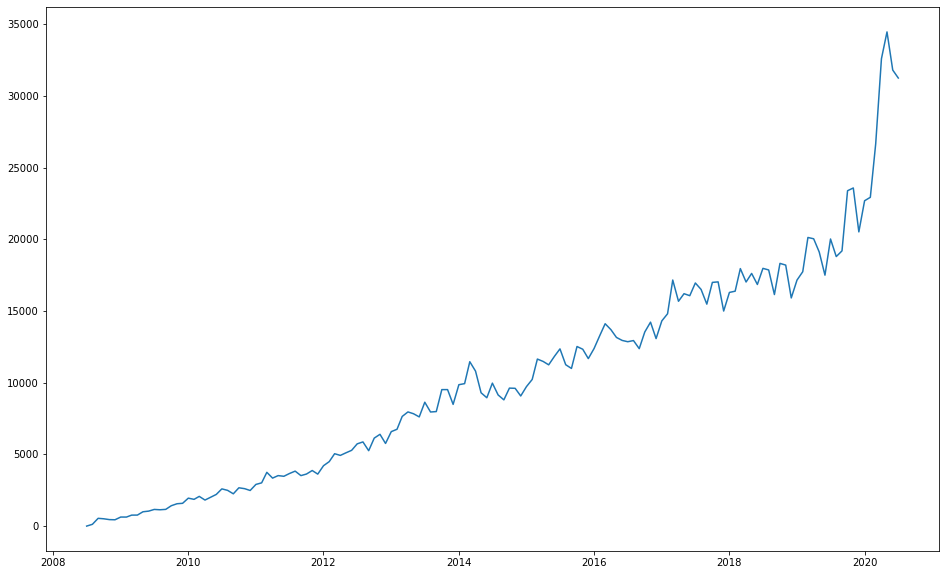

In [18]:
# 맷플롯립으로 파이썬 인기도 그래프 그리기 
plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index, reshaped_df["python"])
plt.show()

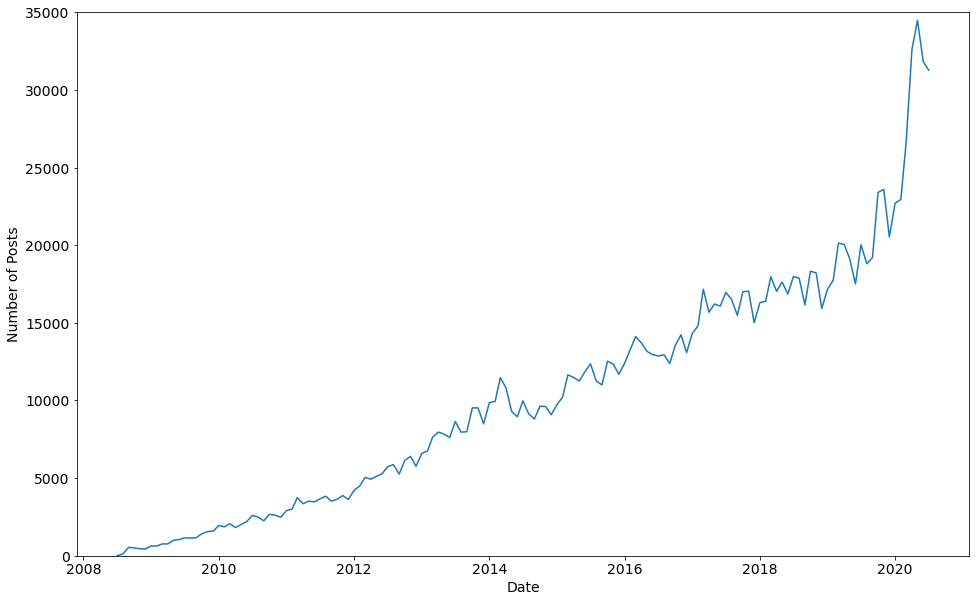

In [20]:
# 스타일 추가
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.python)
plt.show()

### 2-2. 맷플롯립으로 다중 선형차트 그리기

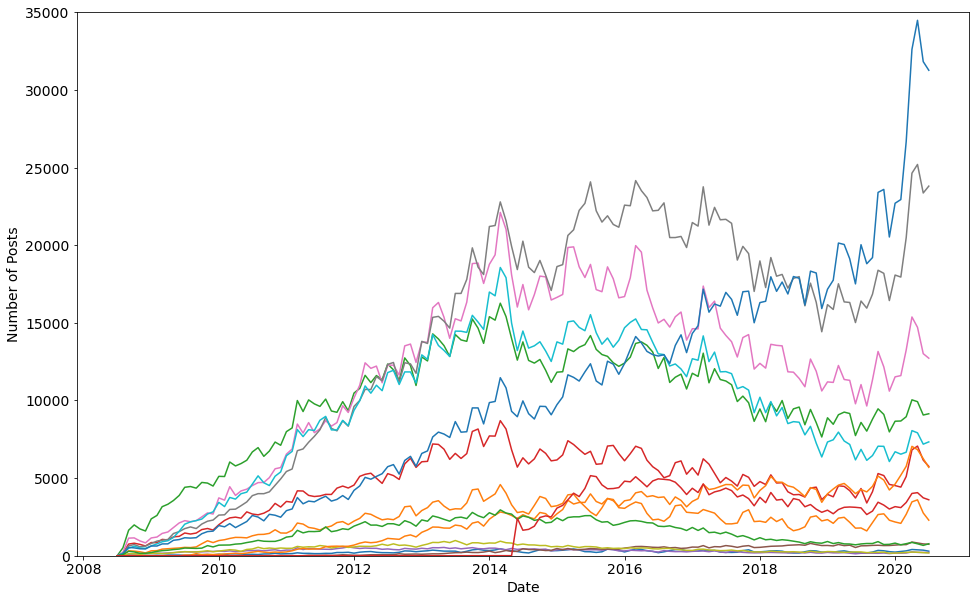

In [23]:
# 모든 개발 언어 동일한 차트에 꺾은선형으로 표시하기 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot all language using for loop
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])
    
plt.show()

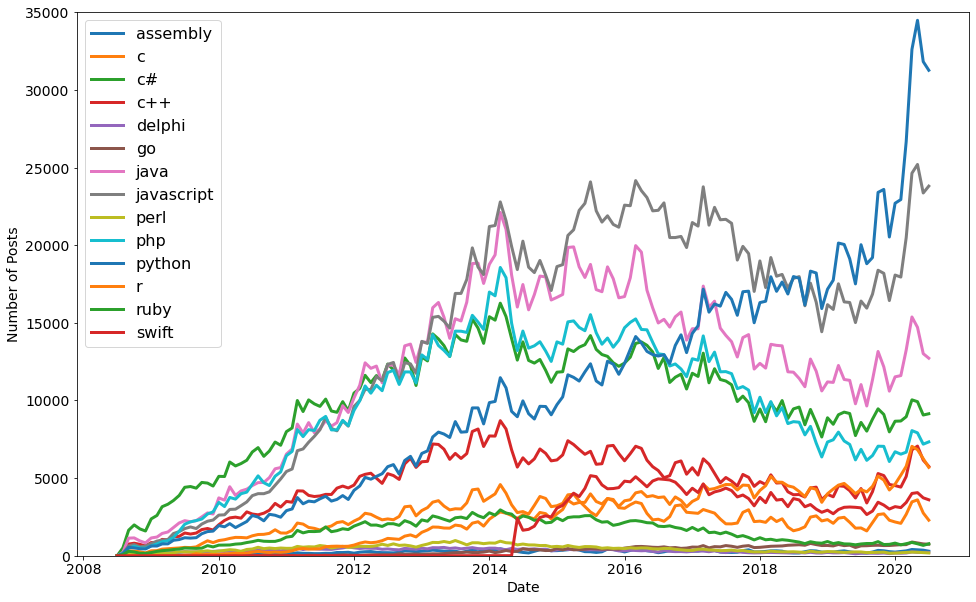

In [25]:
# 스타일 다듬기 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot all language using for loop
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
            linewidth=3, label=reshaped_df[column].name)
    
# show up legend
plt.legend(fontsize=16)
plt.show()

### 2-3. 시계열 차트 다듬기

In [30]:
# 6개씩 평균화된 관측치 연산
roll_df = reshaped_df.rolling(window=6).mean()
roll_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,296.000000,2431.000000,8807.000000,4851.166667,168.666667,687.000000,12050.000000,18252.000000,200.833333,6681.166667,23304.000000,4969.333333,780.000000,3238.000000
2020-04-01,305.500000,2567.000000,8903.500000,5105.333333,183.333333,721.666667,12420.166667,19293.333333,204.833333,6848.333333,24838.500000,5288.000000,771.166667,3332.166667
2020-05-01,316.000000,2716.833333,9040.166667,5421.500000,190.166667,749.500000,12844.500000,20461.500000,203.666667,6993.333333,26653.166667,5614.166667,779.166667,3465.666667


- 데이터 분석을 하다보면 일정 범위에서 규칙적으로 연산(예: 이동평균)을 해야할 일이 많다. (예를 들어, 날마다, 일주일 간의 주가 평균을 알고 싶을 때, 매일 일일이 계산하는 것은 매우 비효율 적이다) 
- 추세를 명확하게 보여주는 유용한 기술은 평균을 취하여 관측치를 평균화하는 것이다. 6개 또는 12개의 관측값을 평균화하여 이동 평균이라고 하는 것을 구성할 수 있다.
- 이때 유용하게 쓸수 있는 함수가 rolling이다. 
    - window: 몇 개씩 연산할지 입력 - 주로 6 아니면 12 
    - mean: 평균 계산

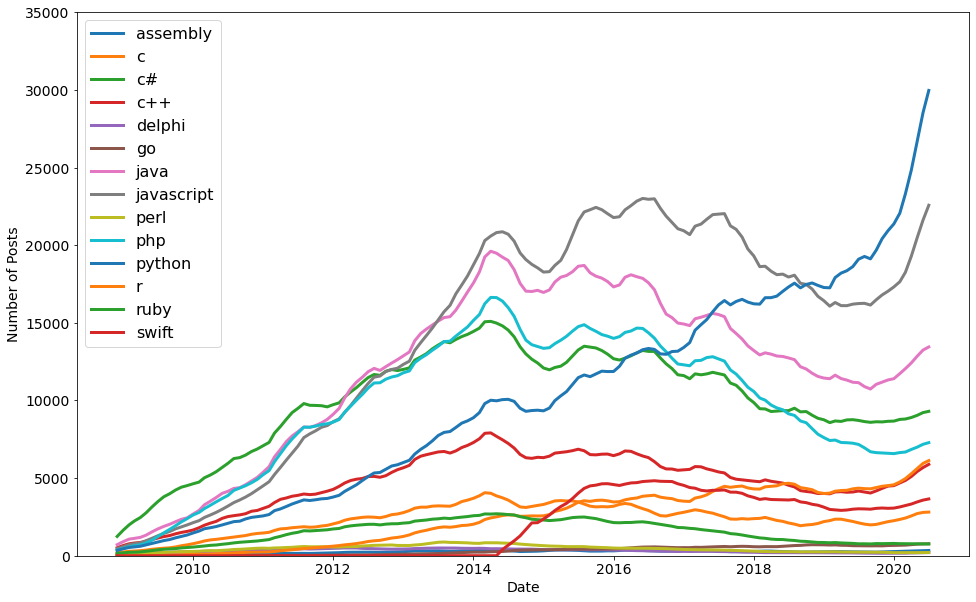

In [31]:
# 맷플롯립으로 그래프 그리기 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)
plt.show()

- 추세선까지 다듬어서 본 결과 지속적으로 인기가 많은 언어는 파이썬으로 나왔다. (파이썬만 오르락 내리락 없이 인기 추세가 계속 오름세를 보인다)
- 그 밖에 인기가 많은 언어는 자바스크립트, 자바, C#, php 순이다. 
- 인기가 없는 언어는 ruby, perl, assembly 등 비교적 오래된 언어들이다.